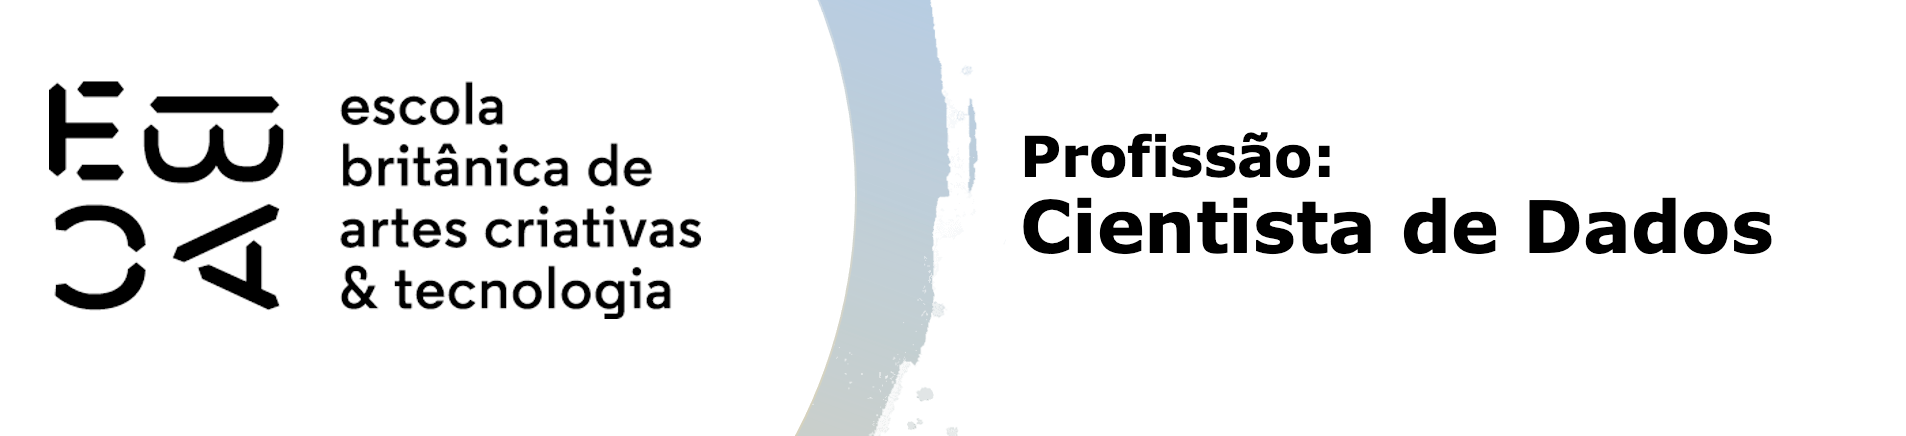

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

In [374]:
df_initial = pd.read_csv('online_shoppers_intention.csv')

In [375]:
df_initial.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [376]:
df_initial.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [378]:
X_train = df_initial.iloc[:, :6]
test_label = df_initial['Revenue']
test_label = test_label.replace({True: 'Purchase', False: 'No Purchase'})

In [379]:
X_train.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

Como as escalas são diferentes, vamos padronizar os dados

In [381]:
X_pad = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)

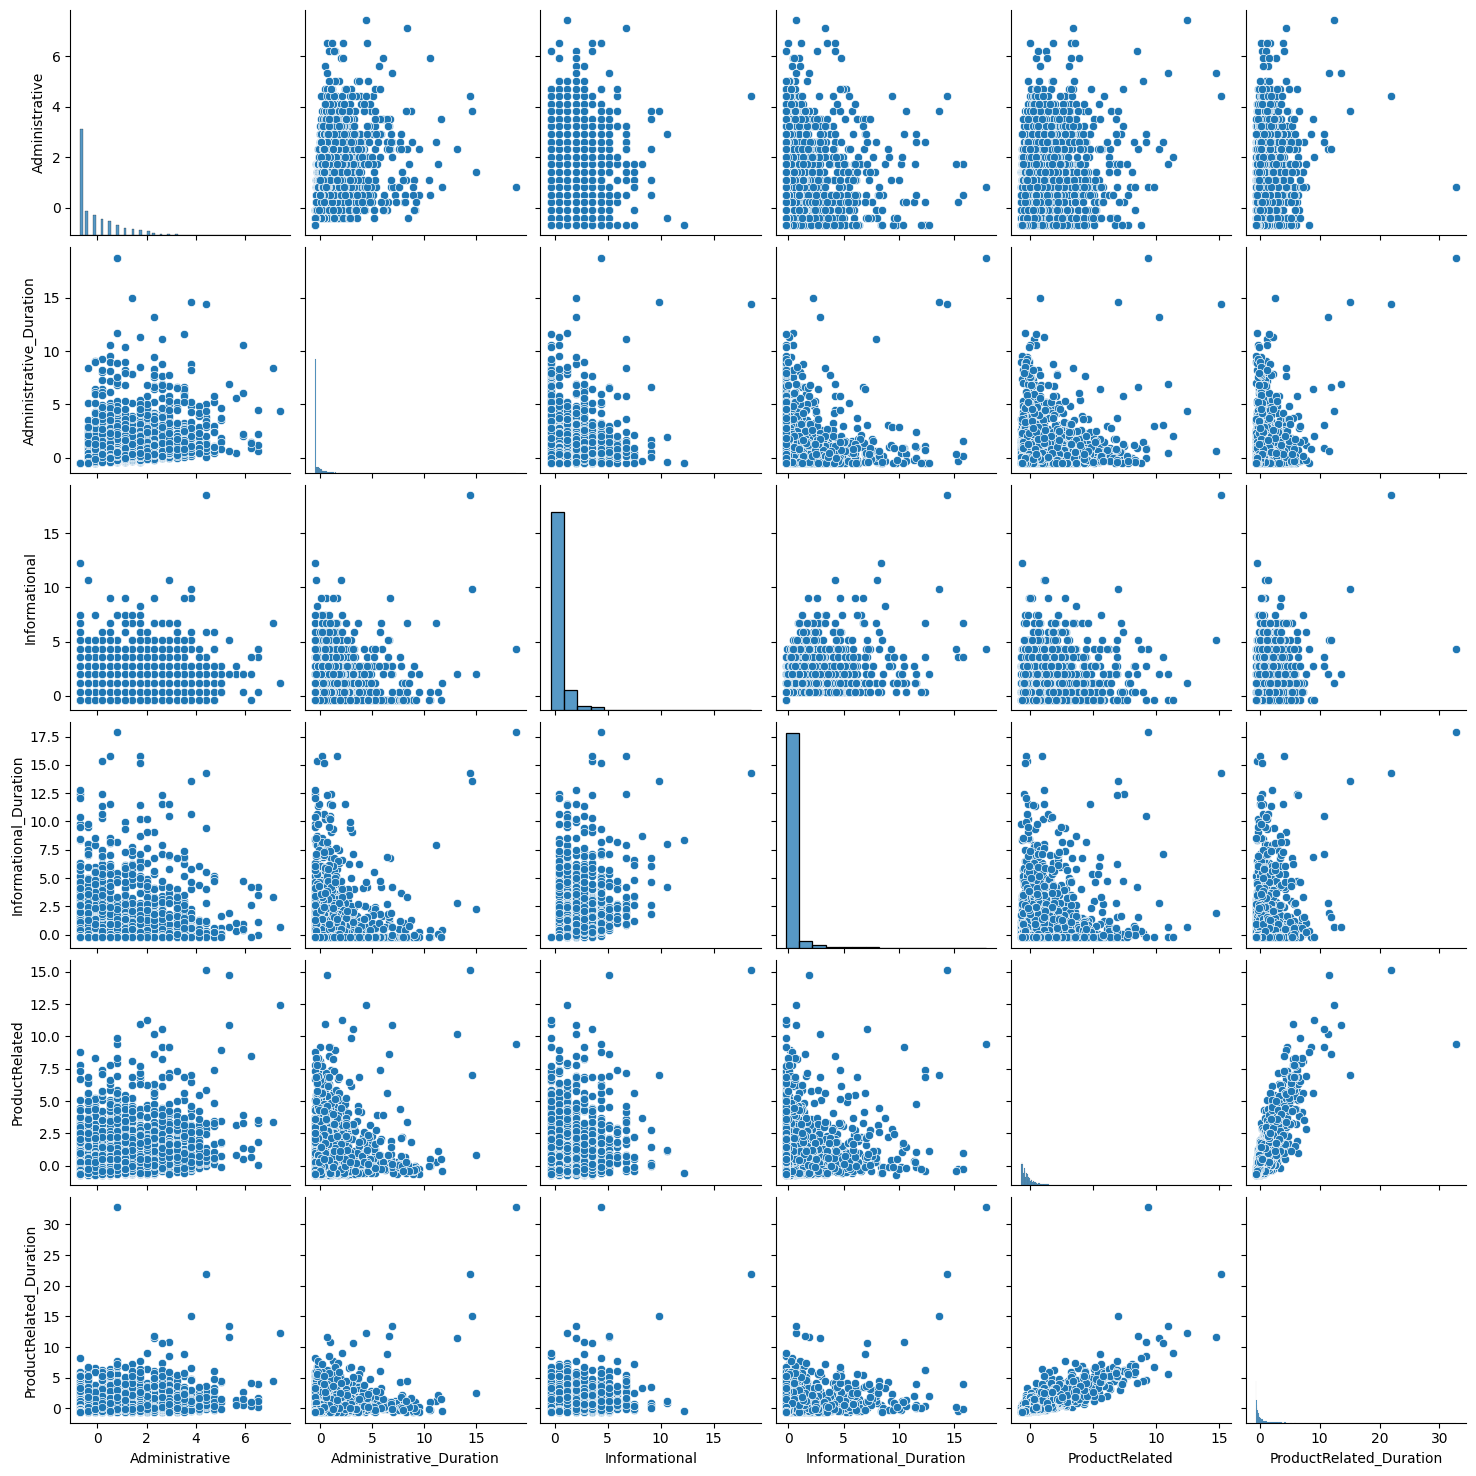

In [382]:
sns.pairplot(X_pad)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

#### Método do "cotovelo"

In [385]:
SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(X_pad)
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

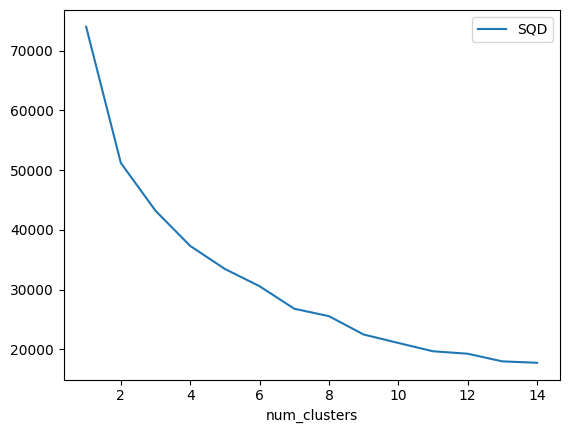

In [386]:
df = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df.plot(x = 'num_clusters', y = 'SQD');

Até o momento, parece pertinente cogitarmos 2 ou 3 clusters, porém, vamos utilizar o método da silhueta para termos uma segunda "opinião".

In [388]:
X_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430
...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536


#### Método da silhueta

In [390]:
siluetas = []
max_clusters = 10
cluster_labels = pd.DataFrame()

for n_clusters in tqdm(range(2, max_clusters + 1)):
    km = KMeans(n_clusters=n_clusters).fit(X_pad)
    siluetas.append(silhouette_score(X_pad, km.labels_))
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    cluster_labels['grupos_' + str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)


  0%|          | 0/9 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

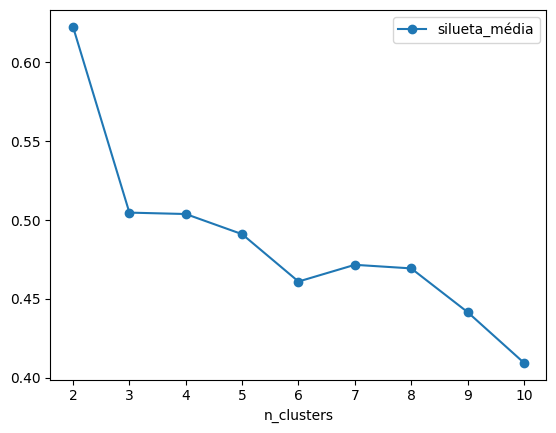

In [391]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})
df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

2 e 3 clusters parecem ser os números ideais

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [394]:
X_pad = pd.concat([X_pad, cluster_labels], axis=1)

In [395]:
X_pad = pd.concat([X_pad, test_label], axis=1)

In [396]:
X_pad = pd.concat([X_pad, df_initial['BounceRates']], axis=1)

C:\Users\Hanga\AppData\Local\Temp\ipykernel_19884\1978127568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = X_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()


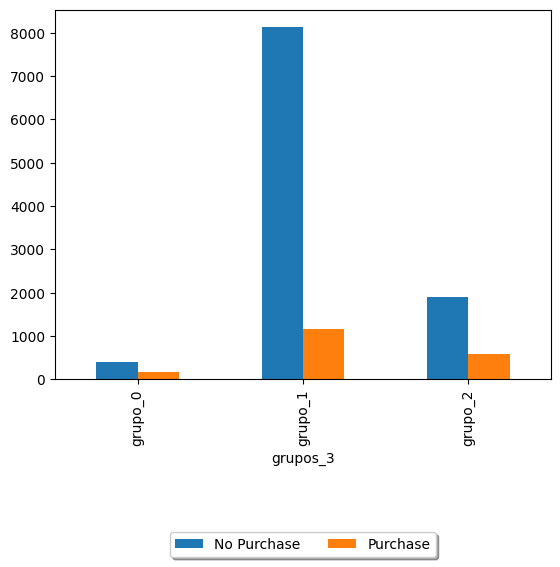

In [397]:
ax = X_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

In [398]:
variaveis = ['Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration']

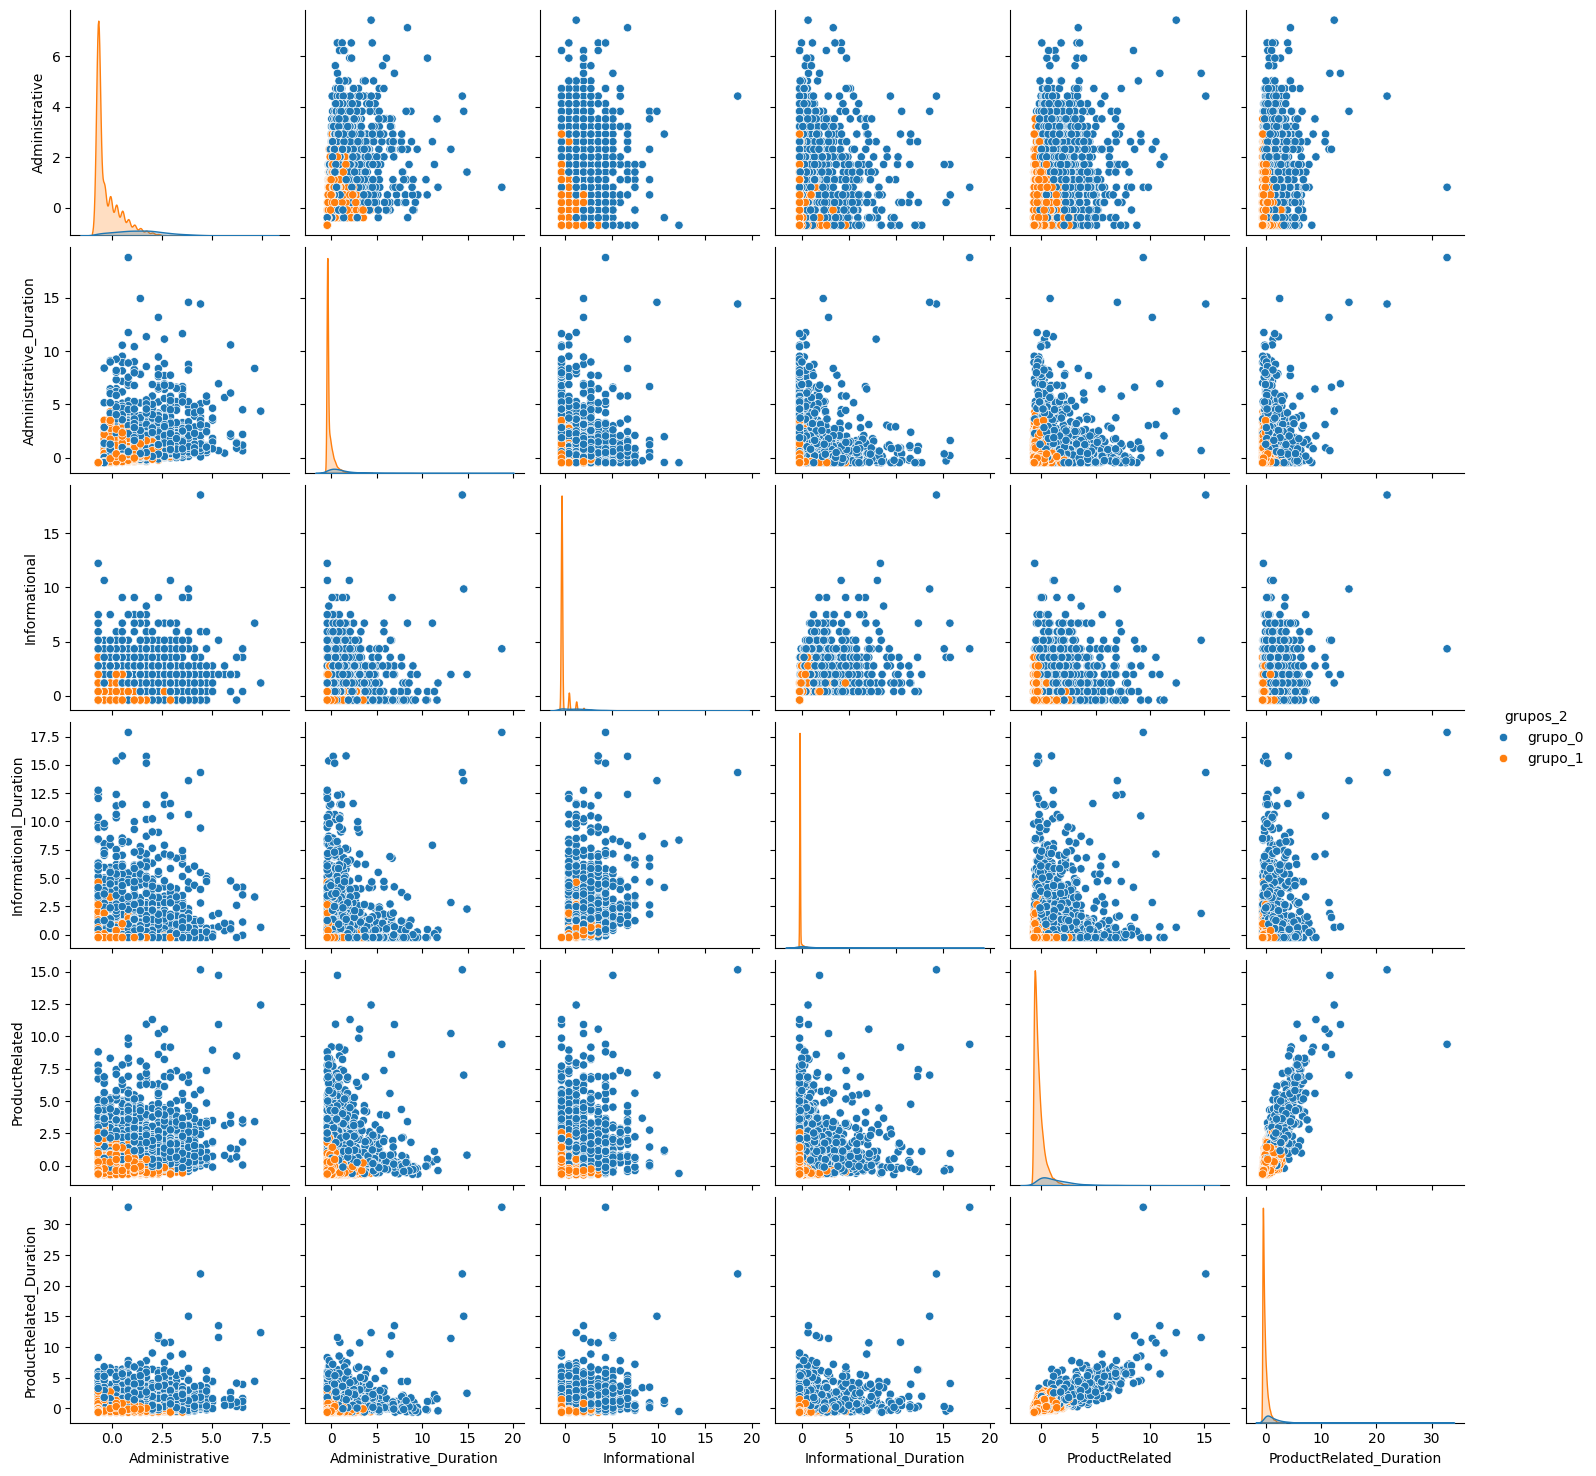

In [399]:
n_clusters = 2
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(X_pad[variaveis + [var_grupo]], hue=var_grupo)

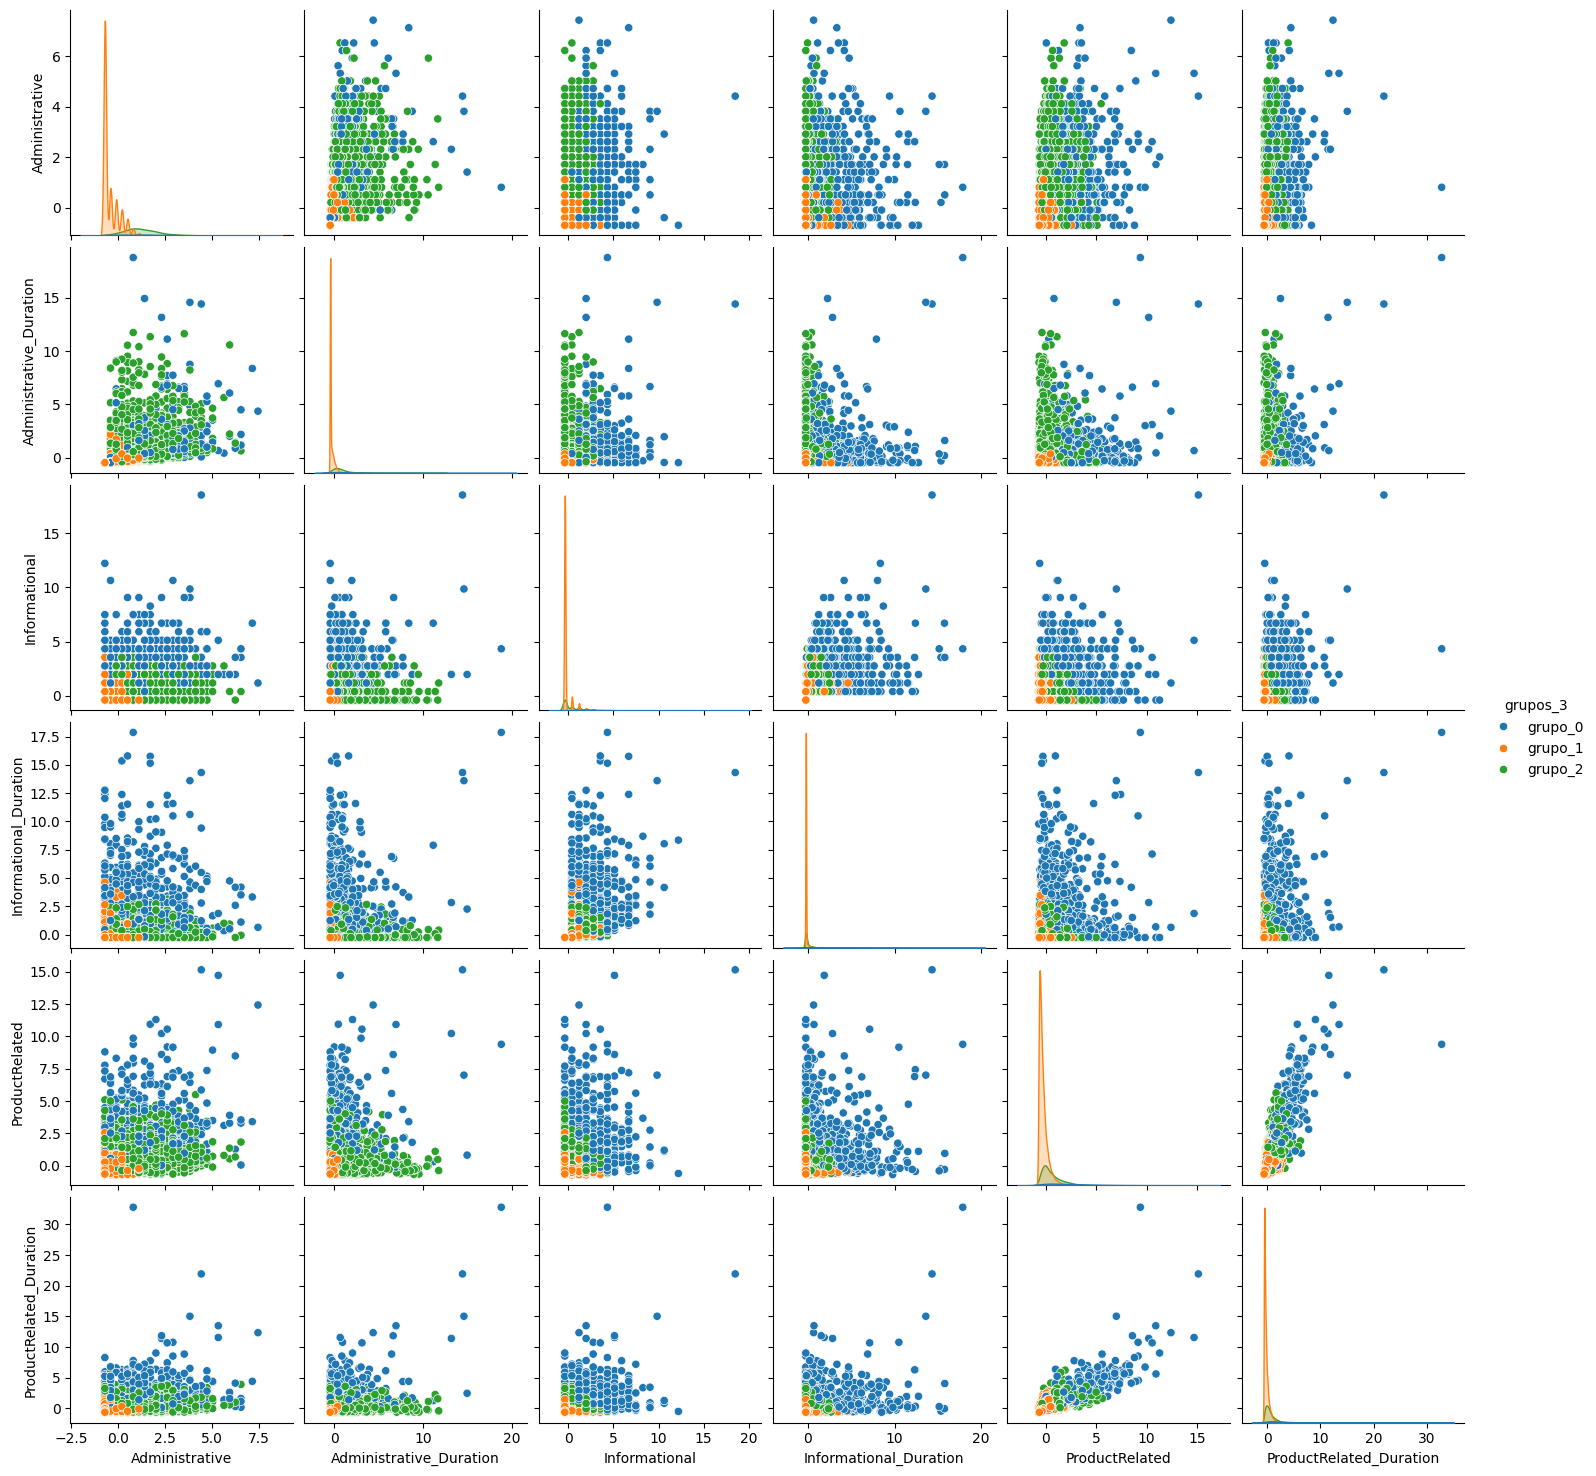

In [400]:
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(X_pad[variaveis + [var_grupo]], hue=var_grupo)

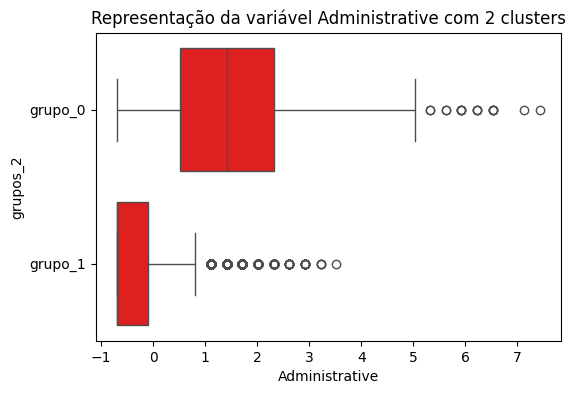

In [401]:
def dataviz_grupos(varx, varg, title):
    fig = plt.subplots(1, 1, sharex=True, figsize=(6, 4))

    sns.boxplot(data=X_pad, y=varg, x=varx, color='red')
    plt.title(title)
    plt.show()

dataviz_grupos(variaveis[0], 'grupos_2', "Representação da variável Administrative com 2 clusters")

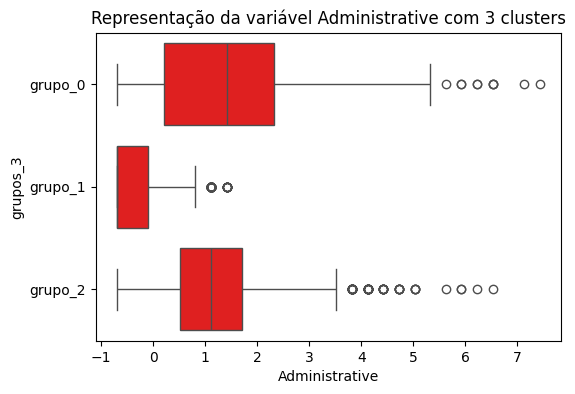

In [402]:
dataviz_grupos(variaveis[0], 'grupos_3', "Representação da variável Administrative com 3 clusters")

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

C:\Users\Hanga\AppData\Local\Temp\ipykernel_19884\1978127568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = X_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()


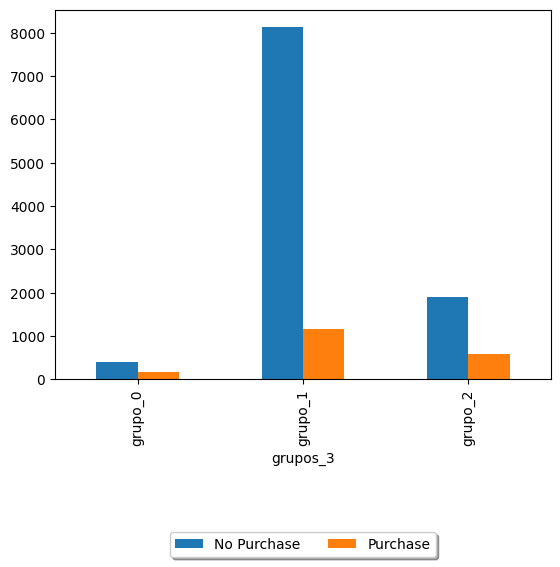

In [404]:
ax = X_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

Em proporção, o grupo 2 é o que mais tende a comprar produtos.

C:\Users\Hanga\AppData\Local\Temp\ipykernel_19884\994917956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bounce_rates = X_pad.groupby('grupos_3')['BounceRates'].mean()


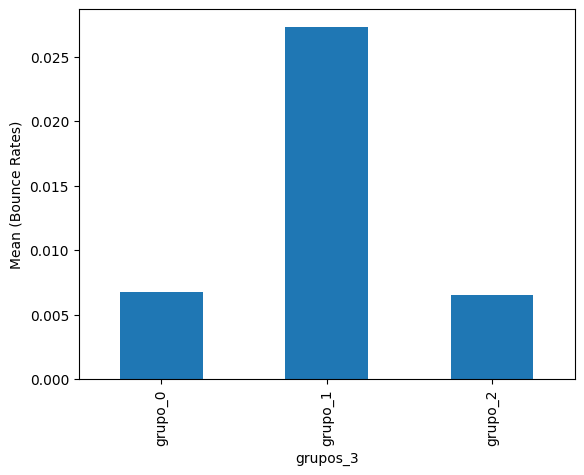

In [437]:
mean_bounce_rates = X_pad.groupby('grupos_3')['BounceRates'].mean()

ax = mean_bounce_rates.plot.bar()
plt.ylabel("Mean (Bounce Rates)")
plt.show()

Ao analisarmos as médias dos bounce rates, vemos que o grupo 1 é o mais propenso a abandonar 